In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from tools import save, load, lprint, checkdir

from plottools import above, below, left, right, plotJLab12, custom_label, color_plot, color_plot_hull

#--matplotlib
import matplotlib
matplotlib.use('PS')
matplotlib.rc('text',usetex=True)
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.lines import Line2D
import pylab as py
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

import matplotlib.gridspec as gridspec
%matplotlib inline

In [27]:
Rowan = '/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/CLAS12_1400affinity_1400_events0.3.xlsx'
data_R = pd.read_excel(Rowan)
data_R

,Unnamed: 0.1,Unnamed: 0,x,z,Q2,pT,target,hadron,partonicaff,currentaff,...,R4,R5,qT,xN,zN,yp,yh,yhtarget,yi,yf
0,0,0,0.163209,0.519495,2.187441,0.372743,proton,pi+,0.5487,0.5252,...,0.846436,0.166720,0.723519,0.161494,0.512584,2.277682,-0.656063,6.250098,1.337596,-0.298215
1,1,1,0.199568,0.344123,2.363906,0.568032,proton,pi+,0.5821,0.4845,...,0.313709,1.159290,1.648771,0.196689,0.333260,2.119317,0.102215,5.555645,1.335759,0.180622
2,2,2,0.143593,0.510882,2.115279,0.145979,proton,pi+,0.5283,0.5141,...,1.277713,0.245072,0.288147,0.142380,0.506247,2.386878,-1.298264,6.437130,1.334989,-0.495559
3,3,3,0.169969,0.376156,1.476711,0.237518,proton,pi+,0.3766,0.3296,...,0.891061,0.115343,0.640114,0.167135,0.367630,2.046889,-0.500376,5.261690,1.129642,-0.124483
4,4,4,0.161929,0.458246,1.731593,0.456901,proton,pi+,0.4484,0.4275,...,0.670442,0.399818,1.003261,0.159823,0.448611,2.171233,-0.231003,5.792015,1.221781,-0.021508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1395,1395,0.130813,0.388649,1.805798,0.670364,proton,pi+,0.4657,0.4637,...,0.308245,1.176860,1.716816,0.129738,0.380076,2.400766,0.271808,6.112288,1.285436,0.347444
1396,1396,1396,0.224520,0.455462,2.081960,0.565936,proton,pi+,0.5256,0.4614,...,0.491301,0.710698,1.250220,0.219922,0.439030,1.944163,-0.117783,5.416061,1.254302,0.029427
1397,1397,1397,0.101397,0.372449,1.586592,0.397305,proton,pi+,0.4073,0.4151,...,0.638837,0.448106,1.068974,0.100824,0.368663,2.588195,-0.106874,6.382543,1.304381,0.070674
1398,1398,1398,0.101397,0.526889,1.586592,0.491195,proton,pi+,0.4055,0.4543,...,0.818740,0.199989,0.934866,0.100824,0.522164,2.588195,-0.261441,6.729687,1.292700,-0.023911


In [28]:
Harut = '/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/jlab12affinity_1400_events0.3.xlsx'
data_H = pd.read_excel(Harut)
data_H

,Unnamed: 0.1,Unnamed: 0,W2,pT,Q2,x,z,hadron,target,partonicaff,...,R4,R5,qT,xN,zN,yp,yh,yhtarget,yi,yf
0,0,0,19.691381,0.100000,1.000000,0.048329,0.1,pi+,proton,0.2453,...,0.510843,0.671694,1.004052,0.048230,0.099189,3.094796,0.545959,5.850101,1.346949,0.404834
1,1,1,19.691381,0.133327,1.000000,0.048329,0.1,pi+,proton,0.2435,...,0.409392,0.893083,1.336535,0.048230,0.099031,3.094796,0.662731,5.850098,1.333203,0.551945
2,2,2,19.691381,0.177761,1.000000,0.048329,0.1,pi+,proton,0.2452,...,0.297482,1.212402,1.776922,0.048230,0.098751,3.094796,0.820224,5.850092,1.347408,0.730567
3,3,3,19.691381,0.237003,1.000000,0.048329,0.1,pi+,proton,0.2475,...,0.195614,1.631612,2.357264,0.048230,0.098257,3.094796,1.016355,5.850082,1.365617,0.953422
4,4,4,19.691381,0.315988,1.000000,0.048329,0.1,pi+,proton,0.2416,...,0.119319,2.125957,3.115168,0.048230,0.097391,3.094796,1.244060,5.850063,1.338112,1.204709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1395,1395,9.249548,0.341534,11.104156,0.545559,0.9,pi+,proton,0.9953,...,0.567476,0.566557,0.387955,0.533244,0.879380,1.895463,-2.092005,6.835526,1.974883,-1.312420
1396,1396,1396,9.249548,0.436637,11.104156,0.545559,0.9,pi+,proton,0.9965,...,0.538510,0.618949,0.495893,0.533244,0.879217,1.895463,-1.876096,6.835526,1.978840,-1.259208
1397,1397,1397,9.249548,0.558223,11.104156,0.545559,0.9,pi+,proton,0.9955,...,0.502566,0.688028,0.633787,0.533244,0.878950,1.895463,-1.649553,6.835526,1.994553,-1.181677
1398,1398,1398,9.249548,0.713665,11.104156,0.545559,0.9,pi+,proton,0.9958,...,0.453766,0.790174,0.809869,0.533244,0.878515,1.895463,-1.415962,6.835526,1.987670,-1.091934


In [47]:
print('Harut data:')
print('x_min =', data_H['x'].min(), '  x_max =', data_H['x'].max(), 
      '\nQ2_min =', data_H['Q2'].min(), '                 Q2_max =', data_H['Q2'].max())

print('\nRowan data:')
print('x_min =', data_R['x'].min(), '  x_max =', data_R['x'].max(), 
      '\nQ2_min =', data_R['Q2'].min(), '   Q2_max =', data_R['Q2'].max())

Harut data:
x_min = 0.04832930238571752   x_max = 0.5455594781168515 
Q2_min = 1.0                  Q2_max = 11.10415605935804

Rowan data:
x_min = 0.0715350918462854   x_max = 0.668303247393284 
Q2_min = 1.00902031322575    Q2_max = 9.05949857031466


In [56]:
print('Harut data:')
print('z_min =', data_H['z'].min(), '                  z_max =', data_H['z'].max(), 
      '\npT_min =', data_H['pT'].min(), '                 pT_max =', data_H['pT'].max(),
      '\nqT_min =', data_H['qT'].min(), '  qT_max =', data_H['qT'].max())

print('\nRowan data:')
print('z_min =', data_R['z'].min(), '    z_max =', data_R['z'].max(), 
      '\npT_min =', data_R['pT'].min(), '  pT_max =', data_R['pT'].max(),
      '\nqT_min =', data_R['qT'].min(), '  qT_max =', data_R['qT'].max())

Harut data:
z_min = 0.1                   z_max = 0.9 
pT_min = 0.1                  pT_max = 2.209965757223014 
qT_min = 0.1113416578860883   qT_max = 9.809247780411509

Rowan data:
z_min = 0.150814279540048     z_max = 0.817314123633368 
pT_min = 0.0041259863104627   pT_max = 1.20437900739977 
qT_min = 0.0135580017304949   qT_max = 3.138247562356188


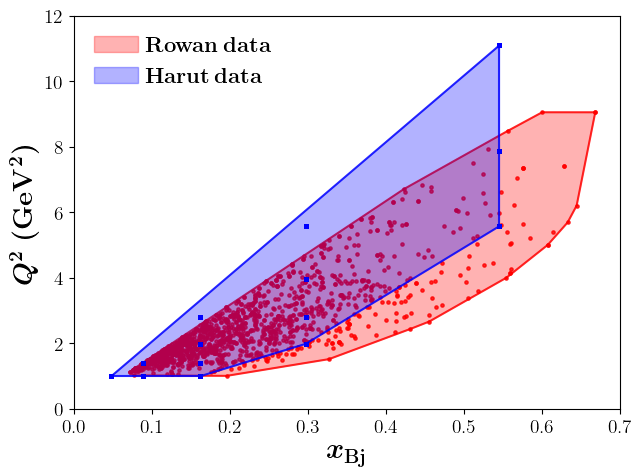

In [57]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
def plotkin():
    fname = '/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/CLAS12_1400affinity_1400_events0.3.xlsx'
    data=pd.read_excel(fname)


    vert_lab = "Q2" 
    hor_lab = "x"
    alpha=0.8

    # Rowan
    vert = data[vert_lab].values
    hor = data[hor_lab].values


    colors = data["tmdaff"]


    fig, ax = plt.subplots()
    ax.tick_params(axis='both', which='minor', labelsize=30, direction='in')
    #ax.tick_params(axis='both', which='major', labelsize=20, direction='in')
    #ax.tick_params(axis='both', which='both', labelsize=20, direction='in')
    #ax.tick_params(axis=‘both’, which=‘both’, labelsize=20, direction=‘in’, length=6)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)



    ax.set_ylabel(custom_label(vert_lab),
                            size=20)
    ax.set_xlabel(custom_label(hor_lab),
                            size=20)

    

    plot = ax.scatter(hor, vert, c="r", alpha=0.8, s=5.5, zorder=7)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'r-', alpha=alpha,zorder=6) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'r',edgecolor='r', alpha=0.3, label=r'\boldmath{$\rm Rowan \, data$}',zorder=5)


    # Harut
    fname = '/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/jlab12affinity_1400_events0.3.xlsx'
    data=pd.read_excel(fname)


    vert = data[vert_lab].values
    hor = data[hor_lab].values

    colors = data["tmdaff"]


    plot = ax.scatter(hor, vert, c="b", alpha=0.8, s=5.5, zorder=12)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'b-', alpha=alpha,zorder=11) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'b', edgecolor='b', alpha=0.3, label=r'\boldmath{$\rm Harut \, data$}',zorder=10)

    
    
    
    fig.tight_layout()

    ax.legend(prop={"size":16},frameon=0,handletextpad=0.3)

#     ax.set_yscale("log")
    ax.set_ylim([0.0, 12])
#     ax.set_xscale("log")
    ax.set_xlim([0.0, 0.7])

    plt.savefig("./Figs/experiments_kinematics.pdf", bbox_inches='tight')
    plt.show()

plotkin()    

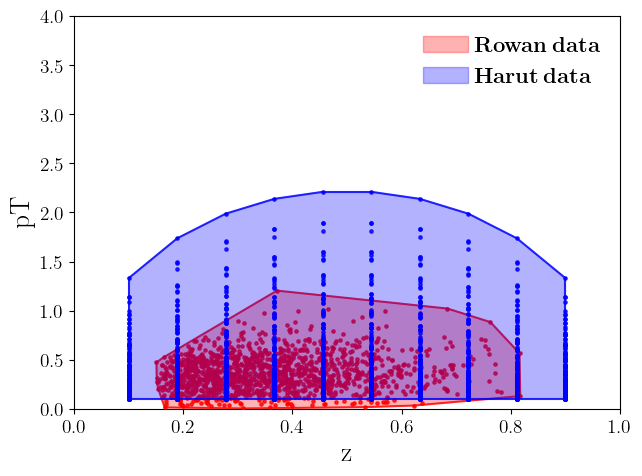

In [24]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
def plotkin():
    fname = '/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/CLAS12_1400affinity_1400_events0.3.xlsx'
    data=pd.read_excel(fname)


    vert_lab = "pT" 
    hor_lab = "z"
    alpha=0.8

    # Rowan
    vert = data[vert_lab].values
    hor = data[hor_lab].values


    colors = data["tmdaff"]


    fig, ax = plt.subplots()
    ax.tick_params(axis='both', which='minor', labelsize=30, direction='in')
    #ax.tick_params(axis='both', which='major', labelsize=20, direction='in')
    #ax.tick_params(axis='both', which='both', labelsize=20, direction='in')
    #ax.tick_params(axis=‘both’, which=‘both’, labelsize=20, direction=‘in’, length=6)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)



    ax.set_ylabel(custom_label(vert_lab),
                            size=20)
    ax.set_xlabel(custom_label(hor_lab),
                            size=20)

    

    plot = ax.scatter(hor, vert, c="r", alpha=0.8, s=5.5, zorder=7)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'r-', alpha=alpha,zorder=6) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'r',edgecolor='r', alpha=0.3, label=r'\boldmath{$\rm Rowan \, data$}',zorder=5)


    # Harut
    fname = '/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/jlab12affinity_1400_events0.3.xlsx'
    data=pd.read_excel(fname)


    vert = data[vert_lab].values
    hor = data[hor_lab].values

    colors = data["tmdaff"]


    plot = ax.scatter(hor, vert, c="b", alpha=0.8, s=5.5, zorder=12)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'b-', alpha=alpha,zorder=11) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'b', edgecolor='b', alpha=0.3, label=r'\boldmath{$\rm Harut \, data$}',zorder=10)

    
    
    
    fig.tight_layout()

    ax.legend(prop={"size":16},frameon=0,handletextpad=0.3)

#     ax.set_yscale("log")
    ax.set_ylim([0.0, 4])
#     ax.set_xscale("log")
    ax.set_xlim([0.0, 1])

    plt.savefig("./Figs/experiments_kinematics_pT_z.pdf", bbox_inches='tight')
    plt.show()

plotkin()   

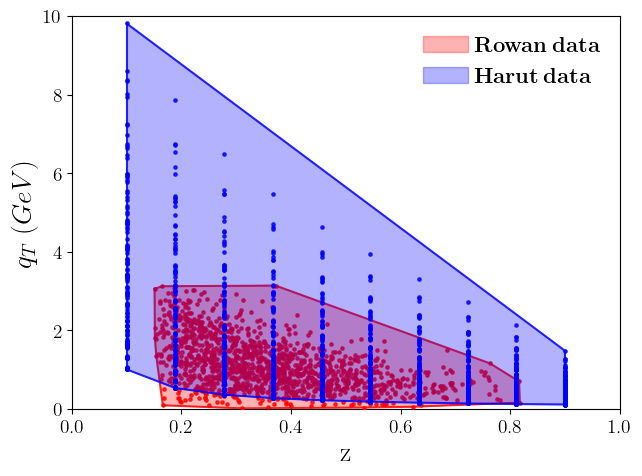

In [30]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
def plotkin():
    fname = '/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/CLAS12_1400affinity_1400_events0.3.xlsx'
    data=pd.read_excel(fname)


    vert_lab = "qT" 
    hor_lab = "z"
    alpha=0.8

    # Rowan
    vert = data[vert_lab].values
    hor = data[hor_lab].values


    colors = data["tmdaff"]


    fig, ax = plt.subplots()
    ax.tick_params(axis='both', which='minor', labelsize=30, direction='in')
    #ax.tick_params(axis='both', which='major', labelsize=20, direction='in')
    #ax.tick_params(axis='both', which='both', labelsize=20, direction='in')
    #ax.tick_params(axis=‘both’, which=‘both’, labelsize=20, direction=‘in’, length=6)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)



    ax.set_ylabel(custom_label(vert_lab),
                            size=20)
    ax.set_xlabel(custom_label(hor_lab),
                            size=20)

    

    plot = ax.scatter(hor, vert, c="r", alpha=0.8, s=5.5, zorder=7)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'r-', alpha=alpha,zorder=6) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'r',edgecolor='r', alpha=0.3, label=r'\boldmath{$\rm Rowan \, data$}',zorder=5)


    # Harut
    fname = '/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/jlab12affinity_1400_events0.3.xlsx'
    data=pd.read_excel(fname)


    vert = data[vert_lab].values
    hor = data[hor_lab].values

    colors = data["tmdaff"]


    plot = ax.scatter(hor, vert, c="b", alpha=0.8, s=5.5, zorder=12)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'b-', alpha=alpha,zorder=11) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'b', edgecolor='b', alpha=0.3, label=r'\boldmath{$\rm Harut \, data$}',zorder=10)

    
    
    
    fig.tight_layout()

    ax.legend(prop={"size":16},frameon=0,handletextpad=0.3)

#     ax.set_yscale("log")
    ax.set_ylim([0.0, 10])
#     ax.set_xscale("log")
    ax.set_xlim([0.0, 1])

    plt.savefig("./Figs/experiments_kinematics_qT_z.pdf", bbox_inches='tight')
    plt.show()

plotkin()   